In [13]:
from pathlib import Path
import pandas as pd
import pint
import pint_pandas
import matplotlib.pyplot as plt
import numpy as np
import sys

In [14]:
sys.path.append(str(Path.cwd().parent))

In [15]:
from src.utils import load_pint_data
from src.utils.pint_units import PREFERRED_UNITS

In [16]:
ROOT = Path.cwd().parent
IS_EXPORT = True
VERSION = "09"
DATA_TYPE = "Training"
print(ROOT)

/Users/thomassimader/Library/CloudStorage/OneDrive-geomeconGmbH/PhD/NIRB


In [17]:
df_path = ROOT  / "data" / VERSION/ f"{DATA_TYPE.lower()}_samples.csv"
assert df_path.exists()
df_training = load_pint_data(df_path)
df_training.dtypes

dip    pint[radian][float64]
dtype: object

In [18]:
for col in df_training.columns:
    if df_training[col].pint.dimensionality in PREFERRED_UNITS:
        unit = PREFERRED_UNITS[df_training[col].pint.dimensionality]
        df_training[col] = df_training[col].pint.to(unit)
units = df_training.dtypes
col_names = [f"{name} ({unit.units:~P})" for name, unit in zip(df_training.columns, units)]
df_training.columns = col_names

In [19]:
temp = df_training.pint.dequantify().agg(["count" ,"min", "max"])
temp

,dip (deg)
unit,degree
count,100.000000
min,55.175836
max,89.839782


In [25]:
df_training.pint.dequantify().describe()

,dip (deg)
unit,No Unit
count,100.000000
mean,72.500418
std,10.154378
min,55.175836
25%,63.856146
50%,72.479161
75%,81.159472
max,89.839782


In [20]:
for column in df_training.columns:  # Loop through the first level of the column multi-index
    df_training[column] = df_training[column].apply(lambda x: x.magnitude)  # Apply unit (adjust 'meter' to fit your case)


In [21]:
df_training.describe()

,dip (deg)
count,100.000000
mean,72.500418
std,10.154378
min,55.175836
25%,63.856146
50%,72.479161
75%,81.159472
max,89.839782


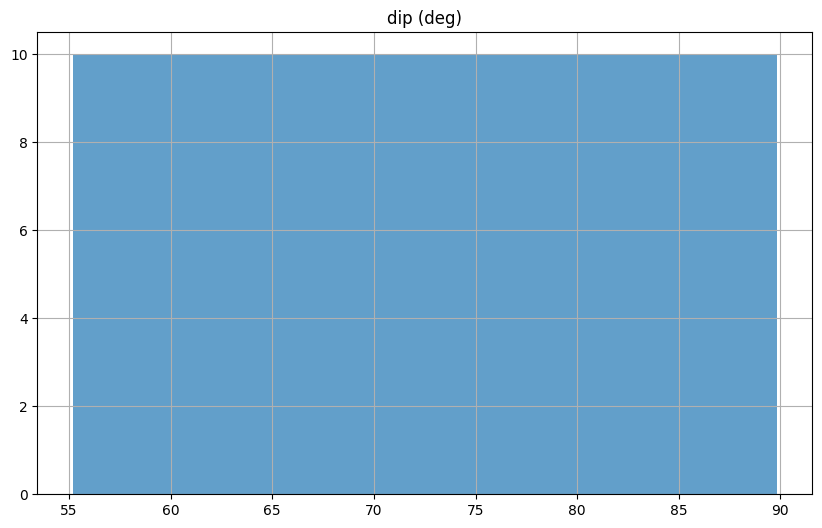

In [22]:
df_training.hist(figsize=(10, 6), alpha=0.7);
if IS_EXPORT:
    plt.savefig(df_path.parent / f"{DATA_TYPE}_histogram.png", dpi=300, bbox_inches='tight')  # You can change the filename and format
plt.show()  # Close the figure if you're done with it


array([[<Axes: xlabel='dip (deg)', ylabel='dip (deg)'>]], dtype=object)

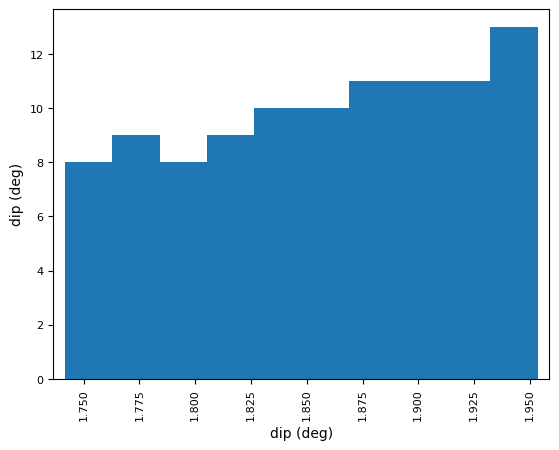

In [23]:
df_transformed = df_training.copy()
first_col = df_training.columns[0]
df_transformed[first_col] = np.log10(df_training[first_col])
pd.plotting.scatter_matrix(df_transformed)

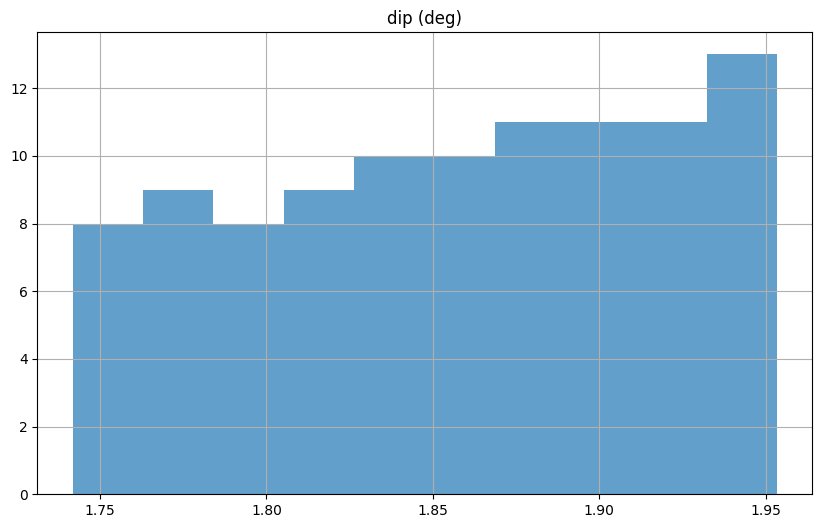

In [24]:
df_training.apply(lambda x : np.log10(x)).hist(figsize=(10, 6), alpha=0.7);
if IS_EXPORT:
    plt.savefig(df_path.parent / f"{DATA_TYPE}_histogram_log.png", dpi=300, bbox_inches='tight')  # You can change the filename and format
plt.show()  # Close the figure if you're done with it